In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
raw_data=pd.read_csv('C:/Users/chandranshu/Desktop/linear regression python/Insurance (1).csv')

In [7]:
raw_data.head()

,Age,Sex,BMI,Smoker,Region,Insurance Charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [8]:
raw_data.shape

(1338, 6)

In [9]:
raw_data.describe()

,Age,BMI,Insurance Charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [10]:
numerical_features=[features for features in raw_data.columns.values if raw_data[features].dtype!='O']
numerical_features

['Age', 'BMI', 'Insurance Charges']

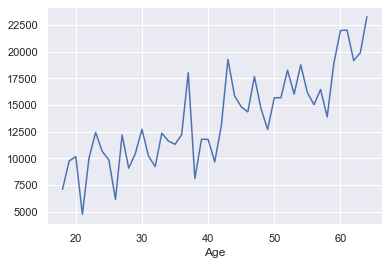

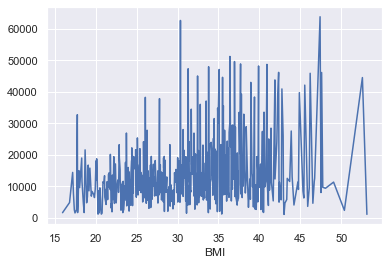

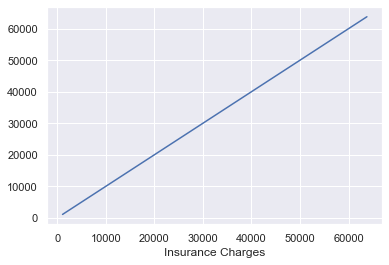

In [11]:
for features in numerical_features:
    raw_data.groupby(features)['Insurance Charges'].mean().plot()
    plt.show()

In [12]:
raw_data.isna().sum()

Age                  0
Sex                  0
BMI                  0
Smoker               0
Region               0
Insurance Charges    0
dtype: int64

In [13]:
#So there are no missing values in the data

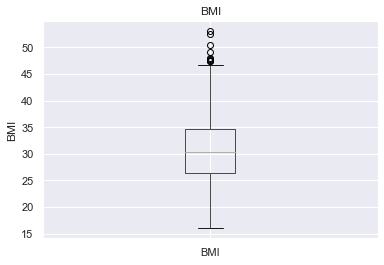

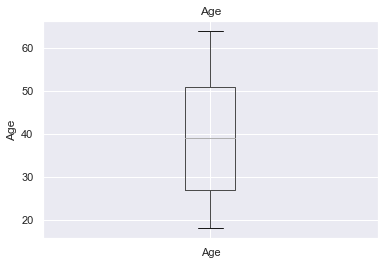

In [14]:
for feature in ['BMI','Age']:
    data=raw_data.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [15]:
#categorical data

In [16]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes=='O']
categorical_features

['Sex', 'Smoker', 'Region']

In [17]:
for feature in categorical_features:
    print(f'The feature is {feature} and number of categories are {len(raw_data[feature].unique())}')

The feature is Sex and number of categories are 2
The feature is Smoker and number of categories are 2
The feature is Region and number of categories are 4


C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


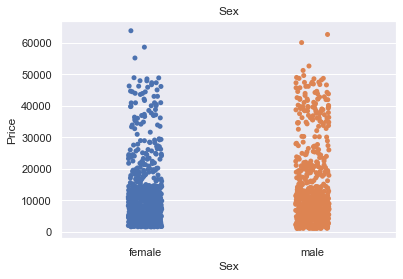

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


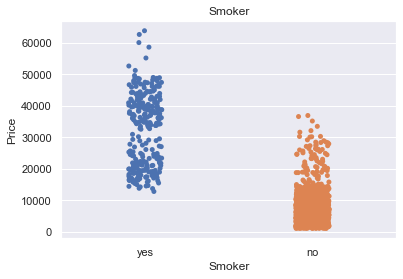

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


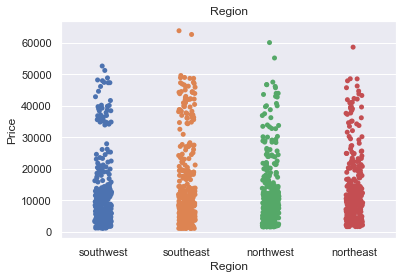

In [18]:
for feature in categorical_features:
    data=raw_data.copy()
    sns.stripplot(data[feature],data['Insurance Charges'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

'''
So we see in the above plots that there is no signifiant impact of region or sex on insurance charges , 
but a smoker has to pay much higher charger than a non smoker
'''

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insurance Charges', ylabel='Density'>

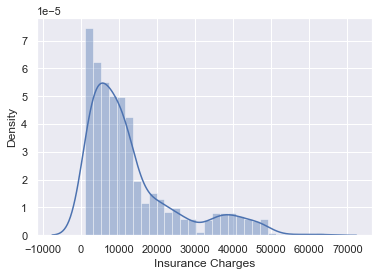

In [19]:
sns.distplot(raw_data['Insurance Charges'])

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

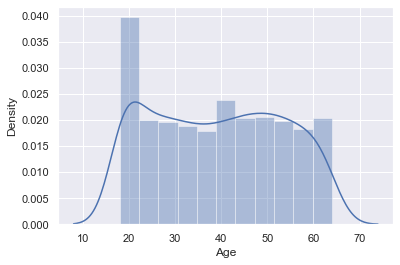

In [20]:
sns.distplot(raw_data['Age'])

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

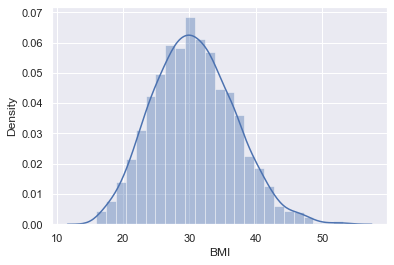

In [21]:
sns.distplot(raw_data['BMI'])

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

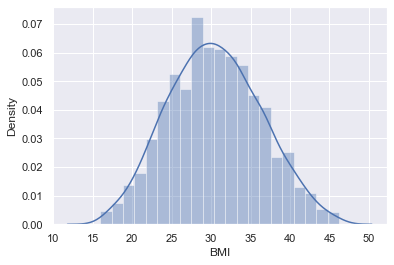

In [22]:
#As the BMI data has some outliers, by boxplot and above graph, we remove the outliers
#finding 99 th quantile
q=raw_data['BMI'].quantile(0.99)
#taking data less than 99 quantile
data_1=raw_data[raw_data['BMI']<q]
sns.distplot(data_1['BMI'])


<AxesSubplot:>

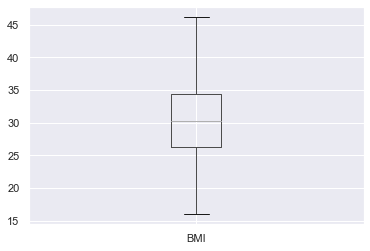

In [23]:
data_1.boxplot(column=['BMI'])

In [24]:
#so now BMI HAS NO OUTLIERS

In [25]:
#multicoliinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= data_1[['BMI','Age']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns
vif

,VIF,features
0,7.594711,BMI
1,7.594711,Age


In [27]:
#as both are under 10, no multicollinearity is present in the data

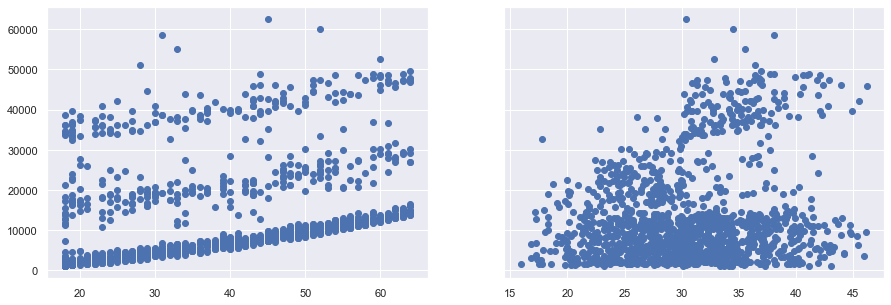

In [28]:
f,(g1,g2)=plt.subplots(1,2,sharey=True,figsize=(15,5))
g1.scatter(data_1['Age'],data_1['Insurance Charges'])
g2.scatter(data_1['BMI'],data_1['Insurance Charges'])

As the graphs of Age Vs Insurance charges and BMI vs Insurance Charges are nearly constant , we can assume that charges are linearly related to age and bmi.

In [78]:
#create dummy variables
data_dummy=pd.get_dummies(data_1,drop_first=True)
data_dummy.head()

,Age,BMI,Insurance Charges,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,16884.92400,0,1,0,0,1
1,18,33.770,1725.55230,1,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0
3,33,22.705,21984.47061,1,0,1,0,0
4,32,28.880,3866.85520,1,0,1,0,0


C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='Smoker'>

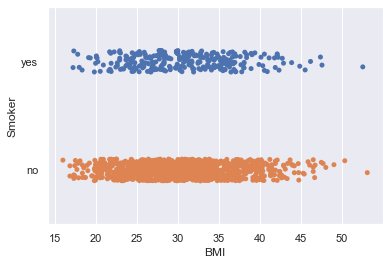

In [171]:
sns.stripplot(raw_data['BMI'],raw_data['Smoker'])

<AxesSubplot:>

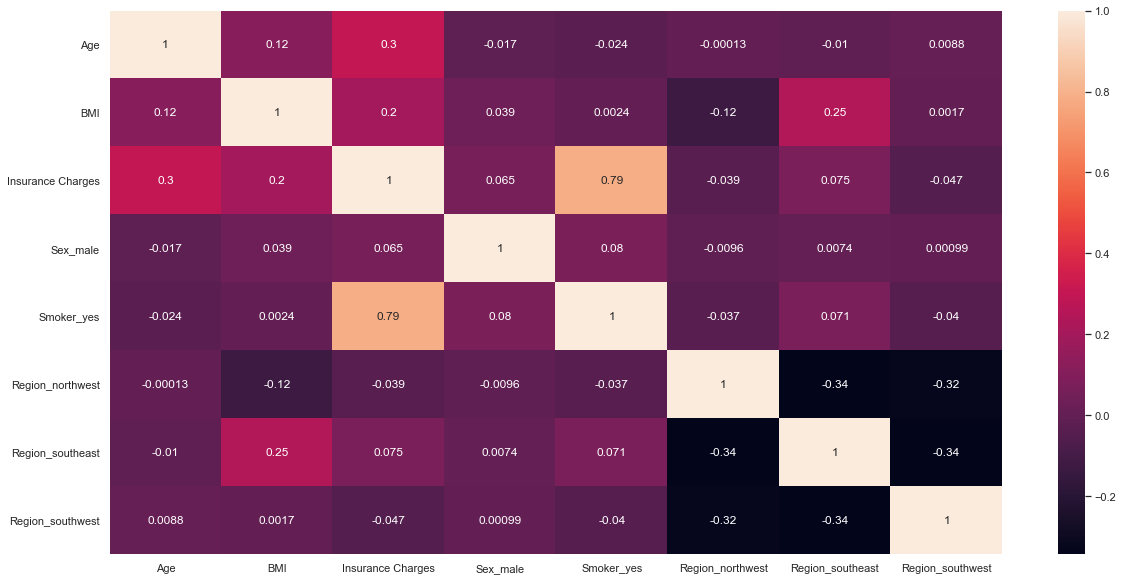

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(data_dummy.corr(),annot=True)

In [80]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [81]:
correlation(data_dummy,0.5)

{'Smoker_yes'}

In [82]:
col=['Age','BMI','Smoker_yes']

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= data_dummy[col]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns
vif

,VIF,features
0,1.250613,log_age
1,1.250613,Smoker_yes


In [85]:
y=data_dummy['Insurance Charges']
x=data_dummy[['Age','BMI','Smoker_yes']]

In [86]:
#As we have seen that region and sex have no differnce and smoker and Smoker is highly related to y
#so these are variables included in model

In [95]:
#scaledata
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [90]:
y_hat=reg.predict(x_train)

<Figure size 1080x504 with 0 Axes>

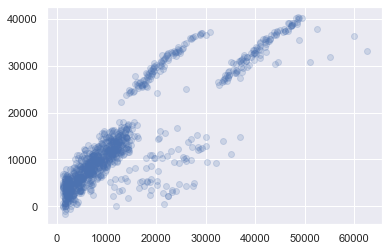

<Figure size 1080x504 with 0 Axes>

In [91]:
plt.scatter(y_train,y_hat,alpha=0.2)
plt.figure(figsize=(15,7))

C:\Users\chandranshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insurance Charges', ylabel='Density'>

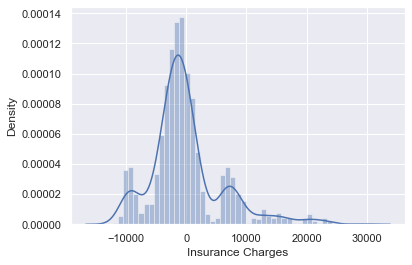

In [92]:
sns.distplot(y_train-y_hat)

In [93]:
#summary table
reg_summary=pd.DataFrame(x.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_

In [94]:
reg_summary

,Features,Weights
0,Age,3583.791084
1,BMI,1881.508876
2,Smoker_yes,9477.487992


In [95]:
reg.intercept_

13153.170898705375

<Figure size 1080x504 with 0 Axes>

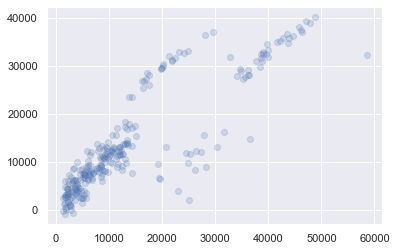

<Figure size 1080x504 with 0 Axes>

In [96]:
#testing
y_hat_test=reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.figure(figsize=(15,7))

In [97]:
reg.score(x_test,y_test)

0.7599834491668274

In [98]:
reg.score(x_train,y_train)

0.7433952303052864

In [99]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
mse=mean_absolute_error(y_test,y_hat_test)
r2=r2_score(y_test,y_hat_test)
print('Mse is :',mse)
print('R^2 is :',r2)

Mse is : 4217.467180033754
R^2 is : 0.7599834491668274


**FINAL OBSERVATIONS**

1)We see that the multiple linear regression is not the best fit for the data

2)We also see that R squared of the model is approx. 76% .

3)Due to presence of outliers MSE may not be the best way to check the model explaining power.

4)Maybe seperate linear models for insurance pricing (less than 30000 and more than 30000) would be better.

5)Smoking is very significant in determining the insurance charges.


**model 2 **

( as on running independent sample t test we found that there is significant difference of mean pricing among males and females at 5% level of significance)

In [100]:
col2=['Age','BMI','Smoker_yes','Sex_male']

In [101]:
variables2= data_dummy[col2]
vif2=pd.DataFrame()
vif2['VIF']=[variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif2['features']=variables2.columns
vif2

,VIF,features
0,7.606478,Age
1,8.531339,BMI
2,1.257526,Smoker_yes
3,1.992692,Sex_male


In [102]:
y2=data_dummy['Insurance Charges']
x2=data_dummy[['Age','BMI','Smoker_yes','Sex_male']]

In [103]:
#scaledata
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x2)
x2_scaled=scaler.transform(x2)

In [104]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_scaled,y2,test_size=0.2,random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x2_train,y2_train)

LinearRegression()

In [106]:
y2_hat=reg.predict(x2_train)

<Figure size 1080x504 with 0 Axes>

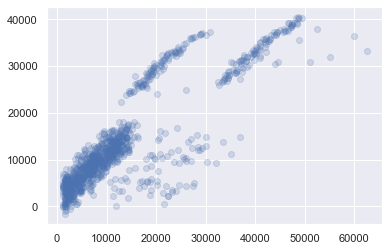

<Figure size 1080x504 with 0 Axes>

In [107]:
plt.scatter(y2_train,y2_hat,alpha=0.2)
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

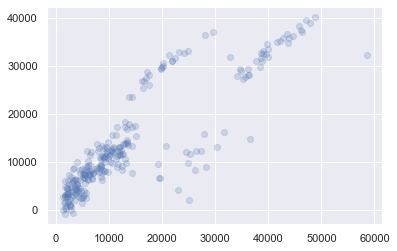

<Figure size 1080x504 with 0 Axes>

In [108]:
#testing
y2_hat_test=reg.predict(x2_test)
plt.scatter(y2_test,y2_hat_test,alpha=0.2)
plt.figure(figsize=(15,7))

In [109]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
mse2=mean_absolute_error(y2_test,y2_hat_test)
r22=r2_score(y2_test,y2_hat_test)
print('Mse is :',mse2)
print('R^2 is :',r22)

Mse is : 4216.599585729828
R^2 is : 0.7599282871615012


**FINAL OBSERVATIONS**

1)We see that the multiple linear regression is not the best fit for the data

2)We also see that R squared of the model is approx. 76% .

3)Due to presence of outliers MSE may not be the best way to check the model explaining power.

4)Gender is not important factor in determining the insurance prices.